# Used Car Price Prediction

## Importing Libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

## Getting Our Data

In [2]:
df=pd.read_csv('CAR_DETAILS.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Data Preprocessing

In [7]:
#checking for null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [13]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
#Dropping Columns which aren't needed
df.drop(['name'],axis=1,inplace=True)

In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
df['age']= 2021 - df['year']

In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [18]:
df.drop(['year'],axis=1,inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [19]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [20]:
df.corr()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


## Data Visualisation

<AxesSubplot:>

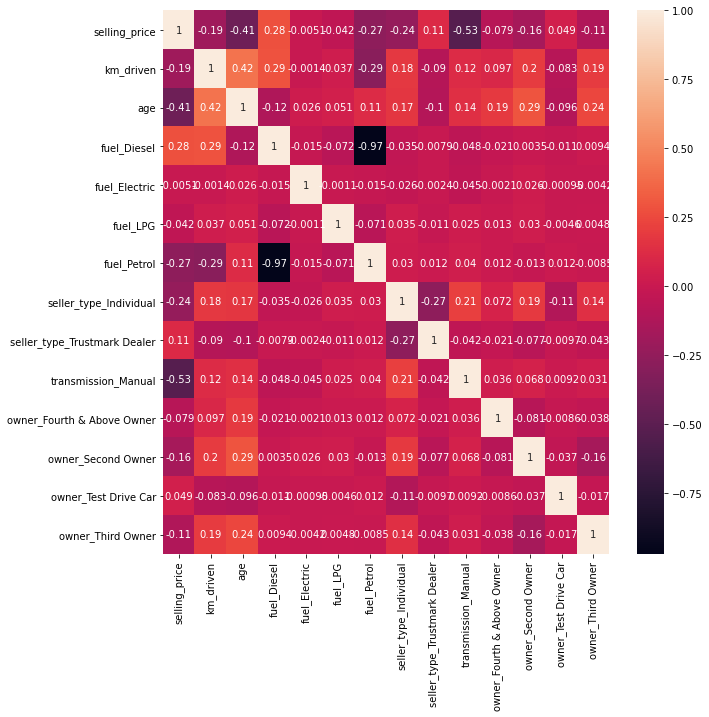

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [25]:
df.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


<Figure size 720x720 with 0 Axes>

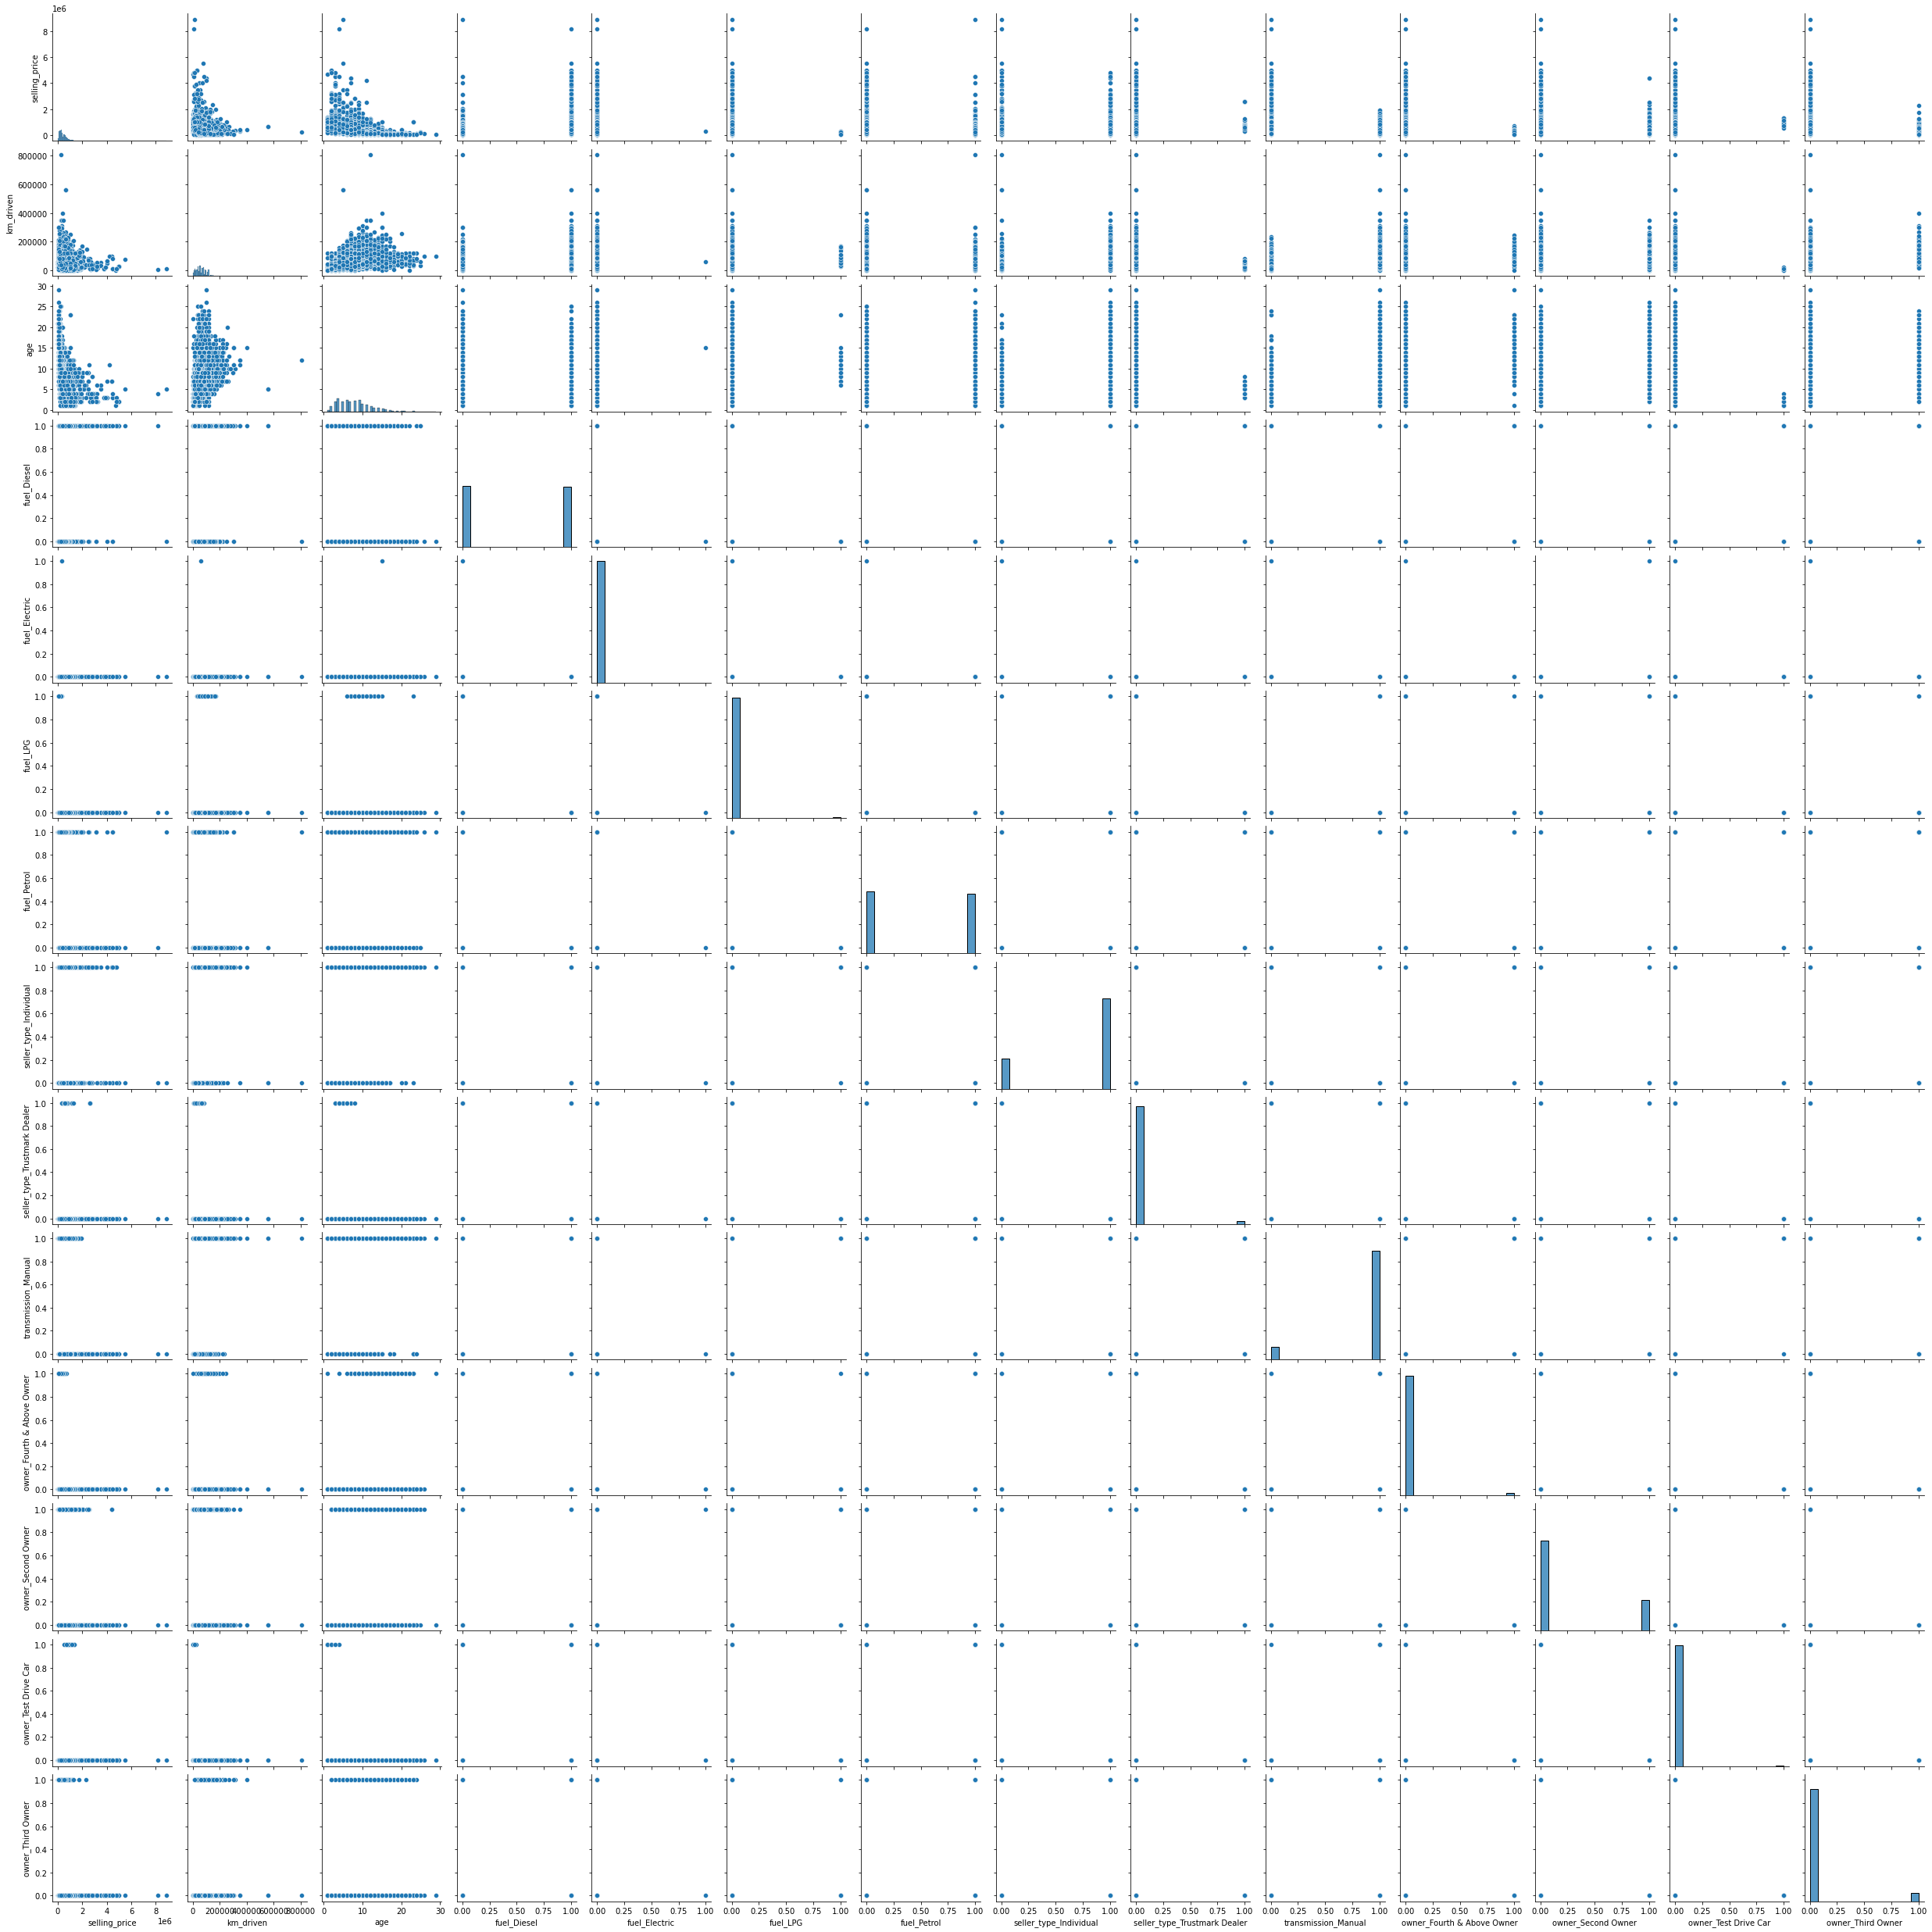

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

## Splitting Data for  Training and Testing

In [28]:
y=df.pop('selling_price')

In [29]:
x=df

In [30]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [233]:
x_train , x_test , y_train , y_Test = train_test_split(x,y,random_state = 36)

## Using Decision Tree Regressor

In [234]:
dt = DecisionTreeRegressor(max_depth = 60,min_samples_leaf=8,max_features=4,min_samples_split=5)

In [235]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=60, max_features=4, min_samples_leaf=8,
                      min_samples_split=5)

In [236]:
dt.score(x_train,y_train)

0.631305890569893

In [237]:
dt.score(x_test,y_Test)

0.6098374037114732

In [238]:
##MODEL OVERFITS

In [239]:
y_predict = dt.predict(x_test)

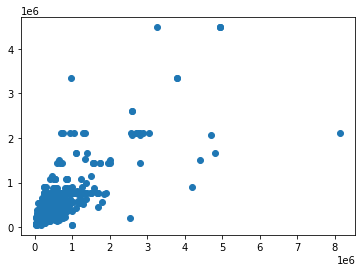

In [240]:
plt.scatter(y_Test,y_predict)
plt.show()

In [241]:
mean_absolute_error (y_Test,y_predict)

182356.55729031

In [242]:
dt_rmse = np.sqrt(mean_squared_error(y_Test,y_predict))
dt_rmse

374923.13626838947

In [243]:
dt_r2 = 1 - (np.sum((y_Test - y_predict)**2) / np.sum((y_Test - y_Test.mean())**2))
dt_r2

0.6098374037114732

## Using Random Forest

In [193]:
et = ExtraTreesRegressor()

In [194]:
et.fit(x,y)

ExtraTreesRegressor()

In [196]:
et.feature_importances_

array([2.50687931e-01, 2.44011218e-01, 1.29993008e-01, 3.67374254e-05,
       2.36257196e-05, 2.19976845e-04, 4.77820987e-02, 8.55405346e-03,
       2.92828954e-01, 7.16415051e-04, 2.04174582e-02, 5.33789009e-04,
       4.19473422e-03])

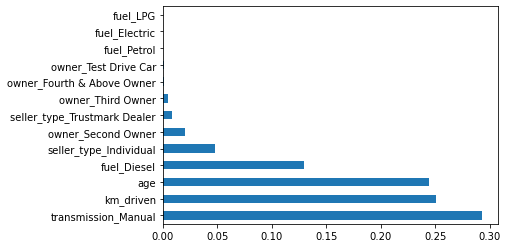

In [198]:
feat_importance = pd.Series(et.feature_importances_, index=x.columns)
feat_importance.sort_values(ascending=False).plot(kind='barh')
plt.show()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [201]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [202]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [203]:
rf = RandomForestRegressor()

In [204]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [208]:
y_pred = et.predict(X_test)

In [209]:
rf_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE: {:.2f}".format(rf_rmse))

RMSE: 104455.94


In [210]:
rf_r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print("R^2: {:.5f}".format(rf_r2))

R^2: 0.96278


## Accuracy of models

In [244]:
model_ev = pd.DataFrame({'Model': ['Decision Tree Regression','Random Forest Regression'], 
                         'RMSE': [dt_rmse, rf_rmse],
                         'R^2': [dt_r2, rf_r2]})
model_ev

,Model,RMSE,R^2
0,Decision Tree Regression,374923.136268,0.609837
1,Random Forest Regression,104455.940370,0.962779
